This notebook analyses the evolution and fitness of the evolved populations.

In [8]:
import os
os.chdir(globals()['_dh'][0])
os.chdir("../")
BaseDirectory = os.getcwd()

import numpy as np
import matplotlib.pyplot as plt

import DataHandler
import importlib
importlib.reload(DataHandler)

from DataHandler import *

# Performance of Nine Solutions

In [9]:
# reading in performance data
os.chdir(BaseDirectory)
os.chdir("./EvoP2")

# array of robust low, roubst avg, avg
unq_perf = np.empty((9,4),dtype=float)
for a in range(9):
    os.chdir("Pop-"+str(a+1))
    unq_perf[a,0] = a+1
    unq_perf[a,1:3] = np.loadtxt("./robust/RPF-01.dat",
        dtype=float,delimiter=" ",skiprows=32,max_rows=1)
    unq_perf[a,3] = np.loadtxt("./record/PF.dat",
        dtype=float,delimiter=" ",skiprows=1,max_rows=1)
    os.chdir("../")

os.chdir(BaseDirectory)
print(unq_perf)

[[1.        0.879773  0.971362  0.971658 ]
 [2.        0.0402298 0.97387   0.991854 ]
 [3.        0.964546  0.991029  0.991217 ]
 [4.        0.92365   0.979257  0.980026 ]
 [5.        0.872951  0.968746  0.968392 ]
 [6.        0.960445  0.992035  0.992161 ]
 [7.        0.959901  0.990739  0.990773 ]
 [8.        0.956803  0.984618  0.98482  ]
 [9.        0.974329  0.990614  0.990595 ]]


## Robustness

In [10]:
# reading data
os.chdir(BaseDirectory)
os.chdir("EvoP2")
r_fit = []
for a in range(9):
    os.chdir("./Pop-"+str(a+1)+"/robust")
    fit = np.loadtxt("RPF-Full.dat",delimiter=" ")
    r_fit.append(np.flipud(fit.transpose()))
    os.chdir("../../")

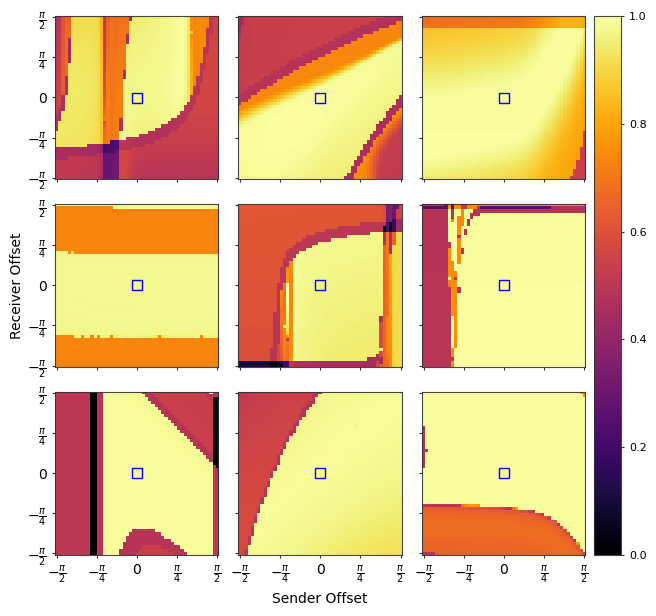

In [11]:
# plotting heatmaps
fig, axs = plt.subplots(3,3,sharex="col",sharey="row",figsize=(10,7))


i = 0
for ax in axs.ravel():
    im = ax.imshow(r_fit[i],extent=[-25.5,25.5,-25.5,25.5],vmin=0,vmax=1,cmap='inferno')
    ax.plot()
    # box indicaed evolved range (~0.4% of the space)
    ax.add_patch(plt.Rectangle((-25/16,-25/16),50/16,50/16,fc="none",edgecolor=[0,0,1]))
    ax.set_xlim([-25.5,25.5])
    ax.set_xticks(np.linspace(-25,25.1,5),
        labels=["$-\\frac{π}{2}$","$-\\frac{π}{4}$",0,
                "$\\frac{π}{4}$","$\\frac{π}{2}$"],
        fontsize=10
    )
    ax.set_ylim([-25.5,25.5])
    ax.set_yticks(np.linspace(-25,25.1,5),
        labels=["$-\\frac{π}{2}$","$-\\frac{π}{4}$",0,
                "$\\frac{π}{4}$","$\\frac{π}{2}$"],
        fontsize=10
    )
    ax.tick_params(length=2.5,color=".2")
    for spine in ax.spines.values():
        spine.set(alpha=.9,ec='.2')
    
    i += 1
    continue

cb = fig.colorbar(im,ax=axs,fraction=.1,anchor=(1.7,0))
cb.ax.tick_params(labelsize=8,length=2.5,color=".2")
for spine in cb.ax.spines.values():
    spine.set(alpha=.9,ec='.2')

axs[1,0].set_ylabel("Receiver Offset",labelpad=2)
axs[2,1].set_xlabel("Sender Offset",labelpad=5)

fig.subplots_adjust(hspace=.15,wspace=-.55)

# os.chdir(BaseDirectory)
# fig.savefig(fname="./Plots/Gaul.fig3.pdf",format="pdf",bbox_inches='tight',dpi=600)
# fig.savefig(fname="./Plots/robust_heatmaps.jpeg",bbox_inches='tight',dpi=600)
plt.show()

## Evolution

In [12]:
# loading data
# this cell takes ~20s to evaluate
unq = []
for a in range(9):
    unq.append(Data(BaseDirectory,maxP=2,popidx=a+1,perm=[0]))

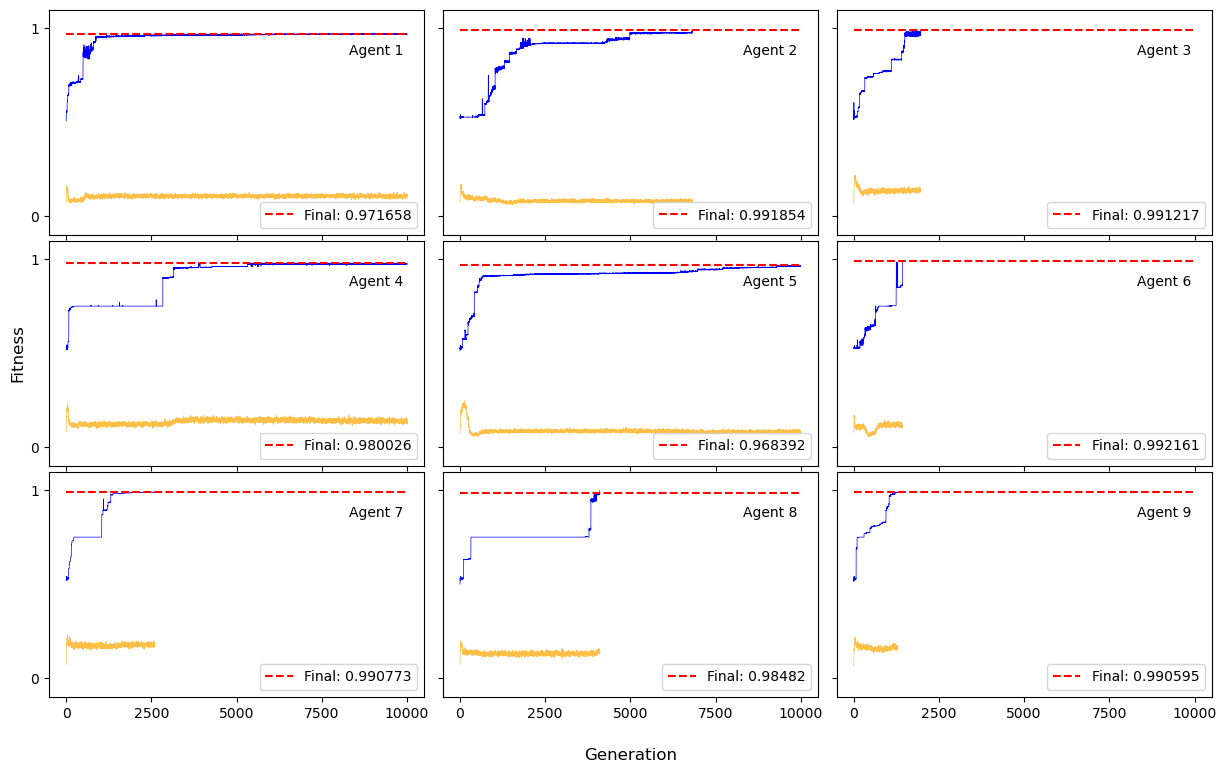

In [13]:
fig, axs = plt.subplots(3,3,figsize=(15,10),sharey="all",sharex="all")
bbox = dict(boxstyle='round',fc='1',edgecolor='1',alpha=1)

i=1
for ax in np.ravel(axs):
    ax = unq[i-1].PlotEvo(ax,mark=True,leg=False)
    ax.set_box_aspect(aspect=.6)
    # legend handle for final fitness value
    h,l = ax.get_legend_handles_labels()
    ax.legend(handles=[h[2]],fontsize=10,loc="lower right")
    ax.text(.8,.8,"Agent "+str(i),transform=ax.transAxes,bbox=bbox)
    i += 1

axs[1,0].set_ylabel("Fitness",fontsize=12)
axs[0,0].set_yticks([0,1])
axs[0,0].set_ylim([-.1,1.1])
axs[0,0].set_xticks(np.arange(0,10001,2500))
axs[2,1].set_xlabel("Generation",fontsize=12,labelpad=20)

plt.subplots_adjust(hspace=-.25,wspace=.05)

# os.chdir(BaseDirectory)
# fig.savefig('./Plots/P2-histograms.pdf',format="pdf",bbox_inches="tight",dpi=600)
# fig.savefig('./Plots/P2-evo-timeseries.jpeg',bbox_inches="tight",dpi=600)
# os.chdir(BaseDirectory)
plt.show()